In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import ppscore as pps

from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool, cv

In [2]:
def reverse_target_edges(edges, target):
    edge_list = []
    for e in edges:
        if target == e[1] or target == e[0]:
            edge_list.append((e[1], e[0], e[2]))
        else:
            edge_list.append(e)
    return edge_list

In [3]:
def reverse_edges(edges):
    return [(e[1], e[0], e[2]) for e in edges]

In [4]:
df = pd.read_csv("./data/diabetes/pima-indians-diabetes.txt", header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
def get_task_type(feature):
    if feature == 0 or feature == 8:
        return "classification"
    else:
        return "regression"

In [7]:
edge_list = []
for i in range(9):
    for j in range(9):
        if i != j:
            task = get_task_type(j)
            score = pps.score(df, i, j, task=task)['ppscore']
            edge_list.append((i, j, score))

/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  

In [8]:
edge_list

[(0, 1, 0.005977284319049758),
 (0, 2, 0.00019811935636449007),
 (0, 3, 0),
 (0, 4, 0),
 (0, 5, 0.002150381793711631),
 (0, 6, 0),
 (0, 7, 0.23391494313658145),
 (0, 8, 0.15232738011446625),
 (1, 0, 0.030448372949919072),
 (1, 2, 0),
 (1, 3, 0),
 (1, 4, 0),
 (1, 5, 0),
 (1, 6, 0),
 (1, 7, 0),
 (1, 8, 0.22983165047170606),
 (2, 0, 0.01733785915210079),
 (2, 1, 0.001067188252514839),
 (2, 3, 0.03707070829904435),
 (2, 4, 0),
 (2, 5, 0),
 (2, 6, 0),
 (2, 7, 0.008248473626628616),
 (2, 8, 0),
 (3, 0, 0.025861935595857467),
 (3, 1, 0),
 (3, 2, 0),
 (3, 4, 0.19105636456147257),
 (3, 5, 0.14724981780583668),
 (3, 6, 0),
 (3, 7, 0),
 (3, 8, 0.054762145193337365),
 (4, 0, 0.0191545252151242),
 (4, 1, 0.012738072609423057),
 (4, 2, 0),
 (4, 3, 0.07151982516502997),
 (4, 5, 0),
 (4, 6, 0),
 (4, 7, 0),
 (4, 8, 0.06577093757870789),
 (5, 0, 0.018182082009668483),
 (5, 1, 0),
 (5, 2, 0),
 (5, 3, 0),
 (5, 4, 0),
 (5, 6, 0),
 (5, 7, 0),
 (5, 8, 0.12909297216992177),
 (6, 0, 0.05068942769539198),
 (6, 

In [9]:
g = nx.DiGraph()

In [10]:
g.add_weighted_edges_from(reverse_target_edges(edge_list, target=8))

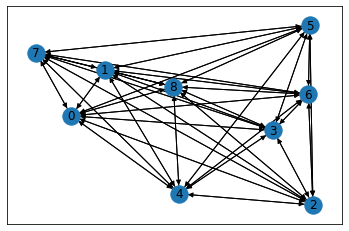

In [11]:
nx.draw_networkx(g)

In [12]:
page_rank = nx.pagerank_numpy(g)

In [13]:
page_rank

{0: 0.36095462264061584,
 1: 0.046490526537435566,
 2: 0.016917595910634294,
 3: 0.05663095010361527,
 4: 0.046817352580952196,
 5: 0.048464755228419934,
 6: 0.020053110621678836,
 7: 0.32837447935843606,
 8: 0.07529660701821193}

In [14]:
[e for e in edge_list if e[0] == 8]

[(8, 0, 0),
 (8, 1, 0.11601140127948195),
 (8, 2, 0),
 (8, 3, 0),
 (8, 4, 0),
 (8, 5, 0.03583327807530001),
 (8, 6, 0),
 (8, 7, 0)]

In [ ]:
rank_df = pd.DataFrame.from_dict({"node": list(page_rank.keys()), "rank": list(page_rank.values())})

In [ ]:
rank_df.sort_values(by=['rank'])

In [ ]:
feat_df = rank_df[rank_df['node'] != 8]

In [ ]:
feat_df = feat_df.sort_values(by=['rank'], ascending=False)

In [ ]:
feat_df['perc'] = feat_df['rank'] / feat_df['rank'].sum()
feat_df['cum_perc'] = feat_df['perc'].cumsum()

In [ ]:
feat_df

In [ ]:
# X = df[[0, 1, 2, 3, 4, 5, 6, 7]].to_numpy()
# X = df[[1, 5, 6]].to_numpy()
X = df[[6, 5]].to_numpy()
y = df[[8]].to_numpy()

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

In [ ]:
X_train.shape

In [ ]:
model = CatBoostClassifier(iterations=500, learning_rate=0.01,
          custom_loss=['AUC', 'Precision'])

In [ ]:
train_pool = Pool(
    data=X_train, 
    label=y_train
)

validation_pool = Pool(
    data=X_validation, 
    label=y_validation)

In [ ]:
params = {
    'loss_function': 'Logloss',
    'iterations': 1000,
    'custom_loss': 'AUC',
    'learning_rate': 0.01,
}

cv_data = cv(
    params = params,
    pool = train_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    verbose=False
)

In [ ]:
cv_data['test-AUC-mean'].max()

In [ ]:
cv_data.head()